In [38]:
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.info() #This method is used to get a concise summary of a DataFrame, including information about the data types, non-null values, and memory usage. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()  #It is a method that provides statistical summary of the numerical columns in a DataFrame. 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.nunique()  #shows unique values in the dataset

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

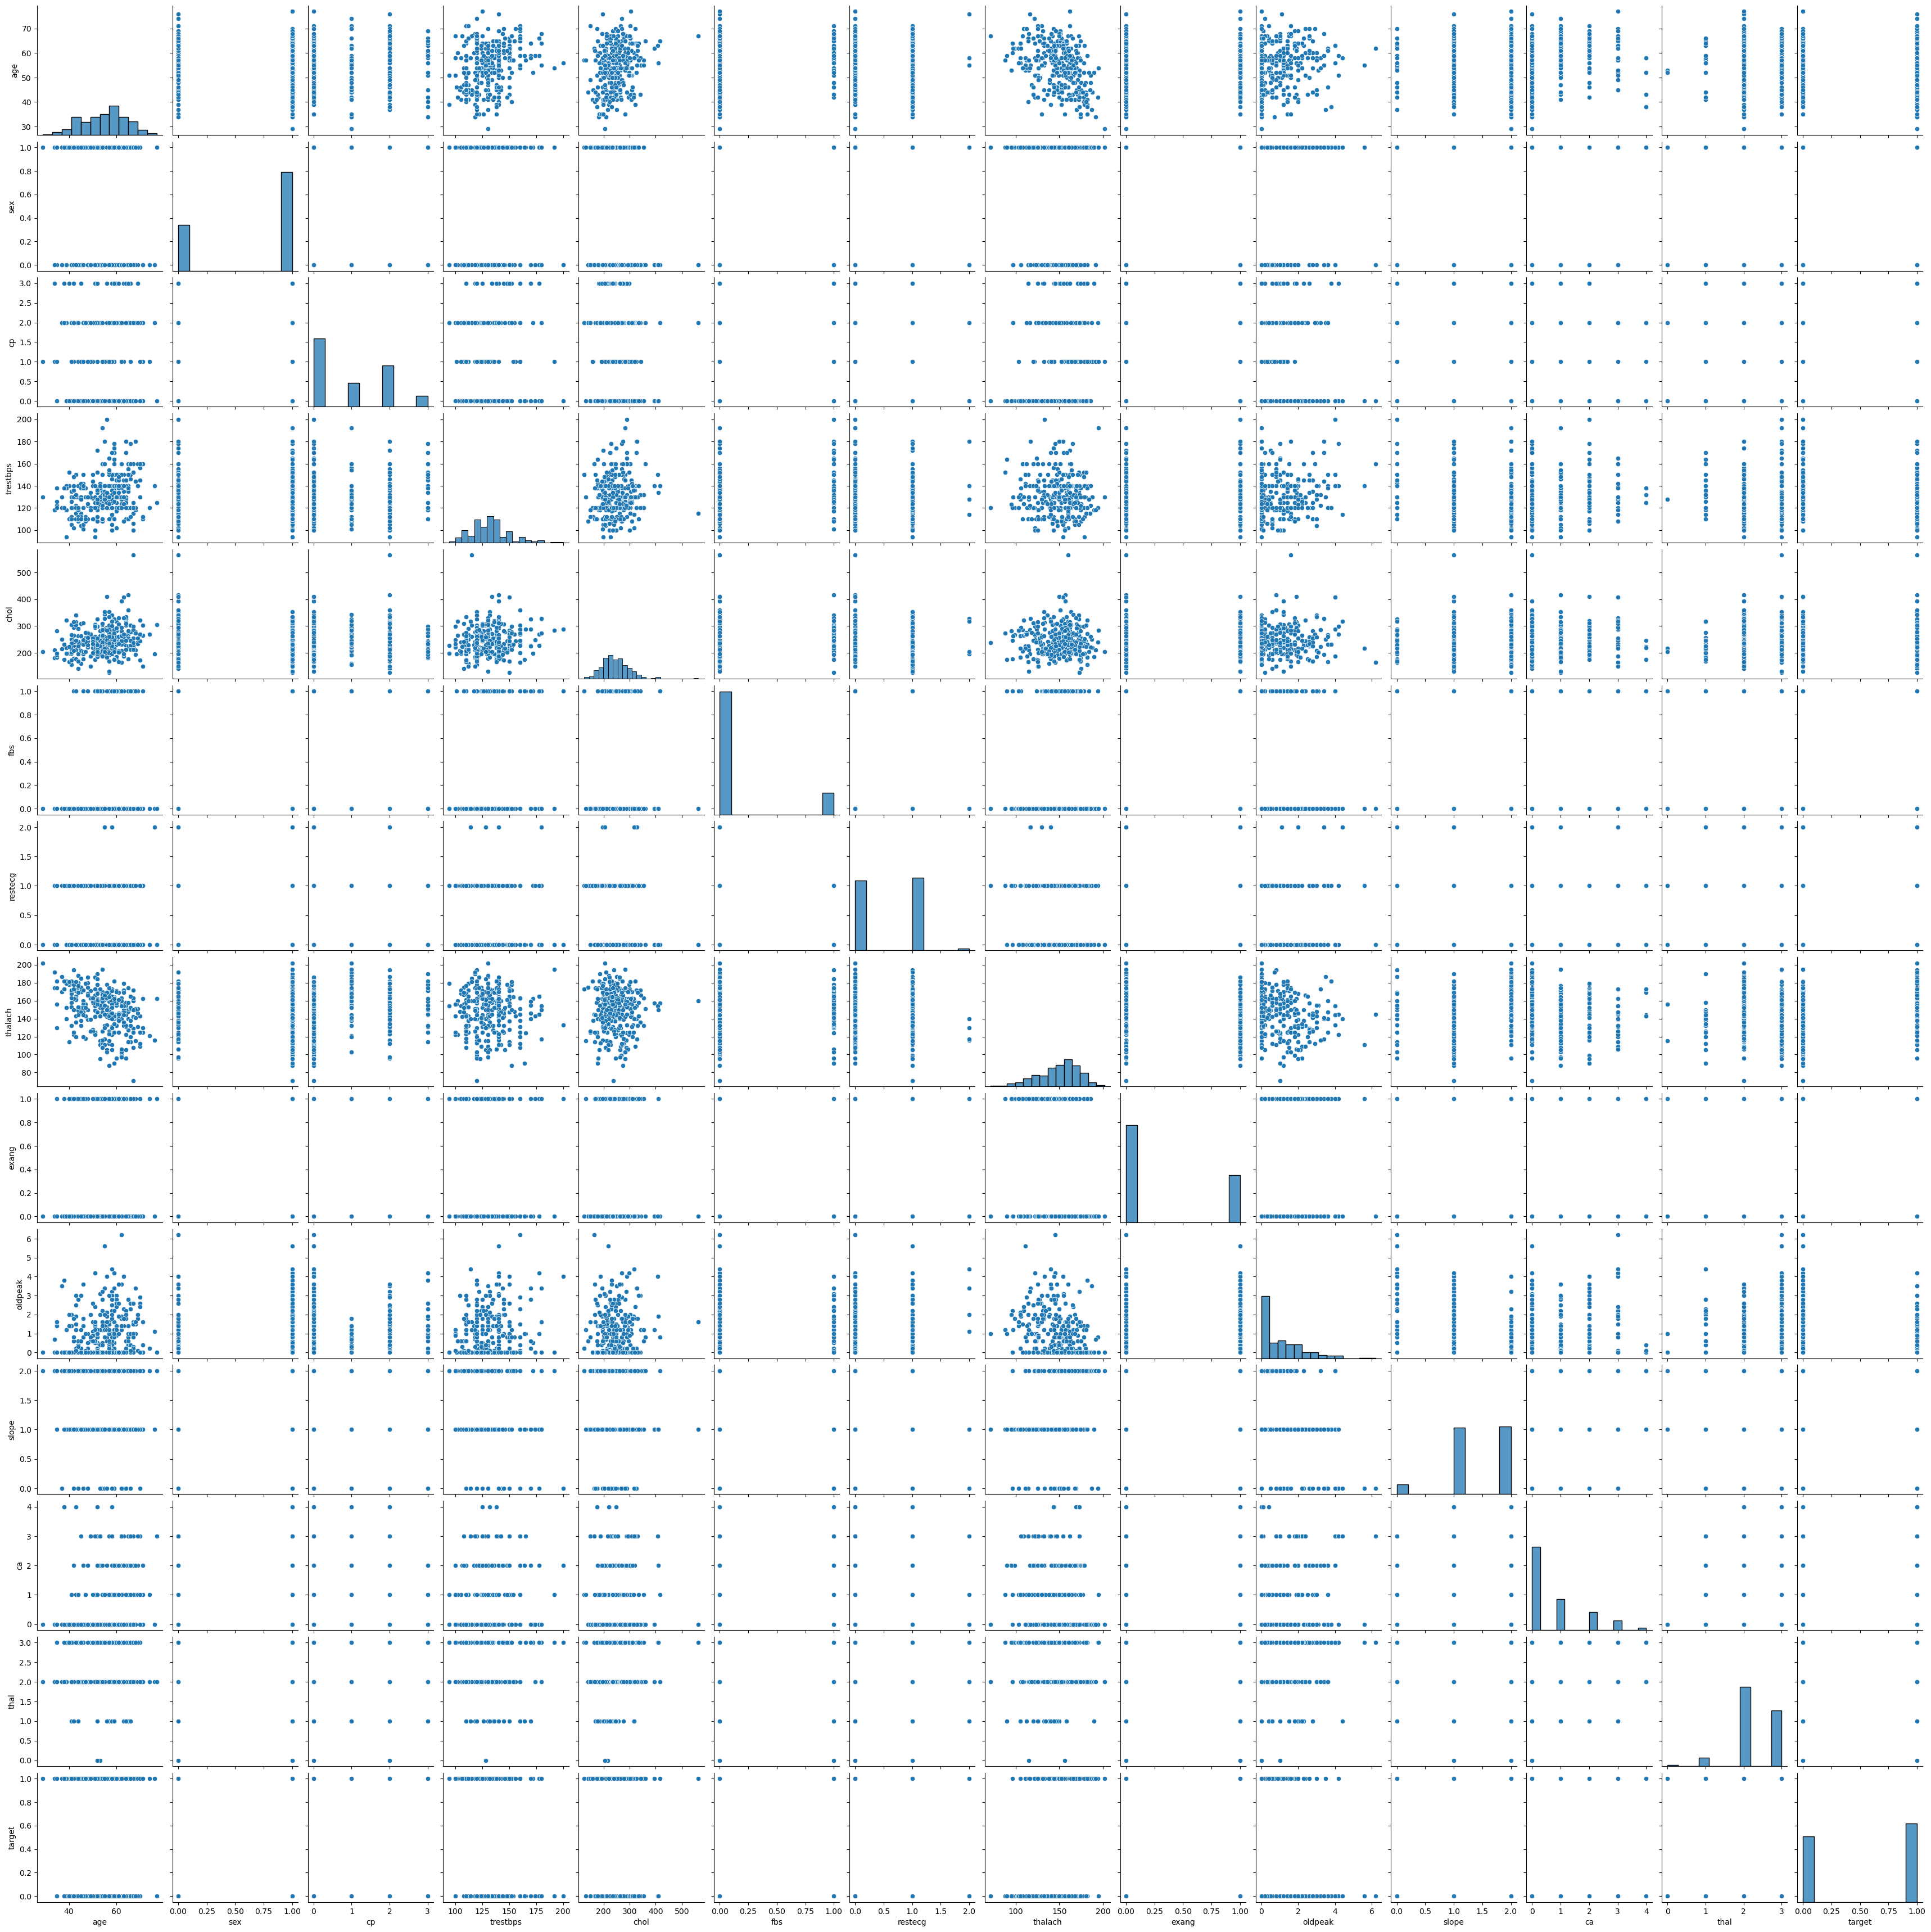

In [6]:
sns.pairplot(data)

# Interpretation Histogram:

The histogram shows that the age distribution is skewed to the right, indicating that there might be more instances of older individuals in the dataset.
The majority of individuals appear to be in the range of approximately 55 to 60 years old.

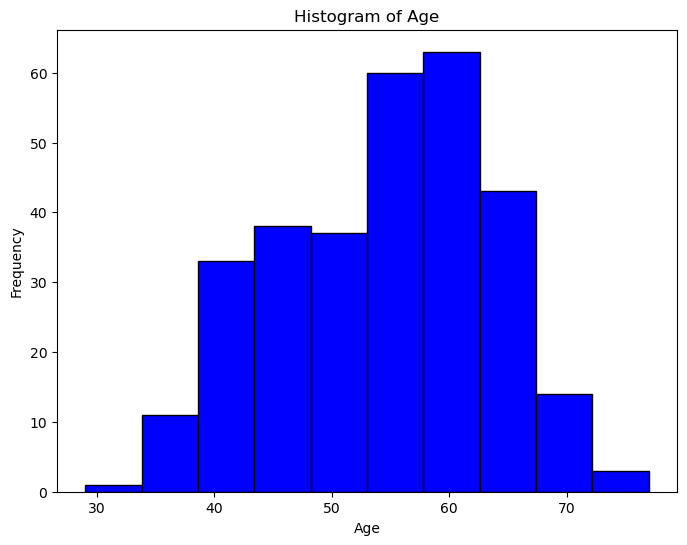

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Interpretation Bar Plot:

The bar plot provides a clear representation of the gender distribution.
It indicates that there are more instances of males compared to females in the dataset.


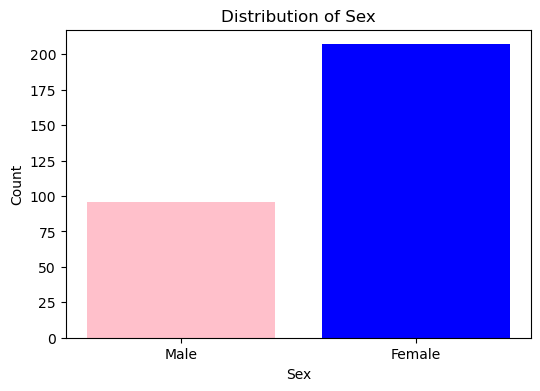

In [8]:
# Bar plot for the "sex" feature
plt.figure(figsize=(6, 4))
sex_counts = data['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.xticks([0, 1], ['Male', 'Female']) 
plt.show()

# Interpretation Scatter Plot:

There doesn't appear to be a strong linear relationship between age and cholesterol levels based on the scatter plot. The points are scattered without a clear pattern.
The distribution of cholesterol levels appears relatively uniform across different ages.

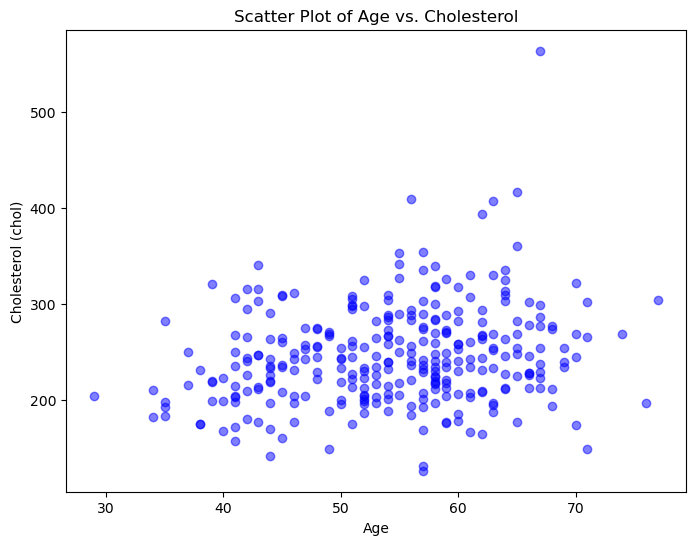

In [9]:
# Creating a scatter plot for "age" vs. "chol"
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['chol'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Cholesterol (chol)')
plt.title('Scatter Plot of Age vs. Cholesterol')
plt.show()

# Interpretation:

For "No Heart Disease" class (target = 0), the violin plot shows that the distribution of ages is relatively wider and has a peak around the middle, suggesting a relatively even distribution of ages.
For "Heart Disease" class (target = 1), the violin plot shows that the distribution of ages is narrower and tends to peak around the slightly older ages, suggesting that a higher proportion of individuals with heart disease might be older.
The violin plot helps visualize how the age distribution varies between the two classes of heart disease. It shows that individuals with heart disease might be slightly older on average compared to those without heart disease.

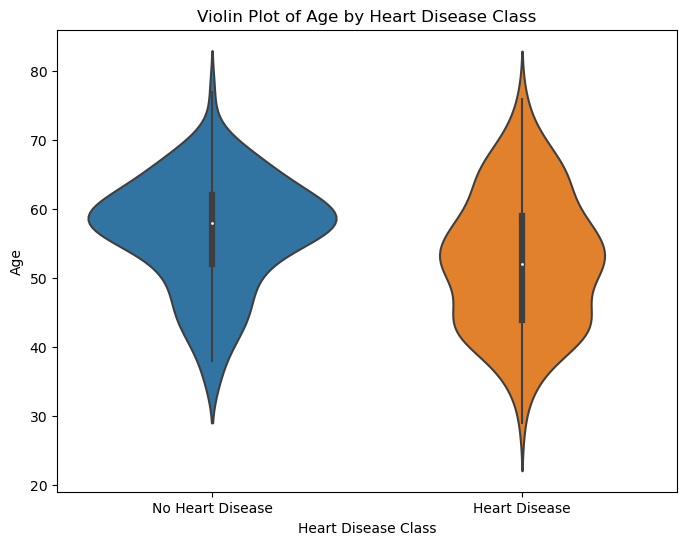

In [10]:
# Creating a violin plot for "age" based on heart disease class
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='age', data=data)
plt.xlabel('Heart Disease Class')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Heart Disease Class')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

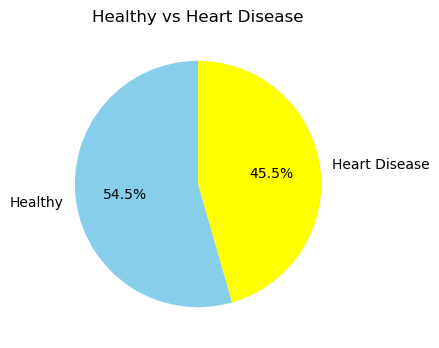

In [11]:
healthy_or_not = data['target'].value_counts().tolist()
labels = ["Healthy", "Heart Disease"]
colors = ["skyblue", "yellow"]

plt.figure(figsize=(7, 4))
plt.pie(healthy_or_not, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Healthy vs Heart Disease")
plt.show()


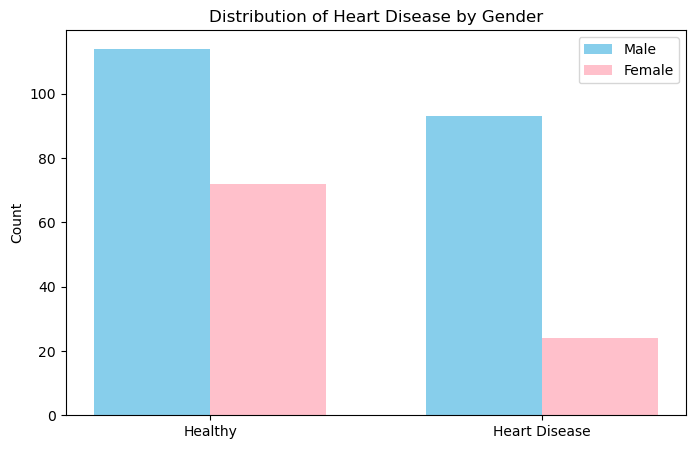

In [12]:
male_counts = data[data['sex'] == 1]['target'].value_counts().tolist()
female_counts = data[data['sex'] == 0]['target'].value_counts().tolist()

labels = ["Healthy", "Heart Disease"]  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 5))

# Plotting bars for males
ax.bar([0 - width/2, 1 - width/2], male_counts, width, label='Male', color='skyblue')

# Plotting bars for females
ax.bar([0 + width/2, 1 + width/2], female_counts, width, label='Female', color='pink')

ax.set_ylabel('Count')
ax.set_title('Distribution of Heart Disease by Gender')
ax.set_xticks([0, 1])
ax.set_xticklabels(labels)
ax.legend()

plt.show()




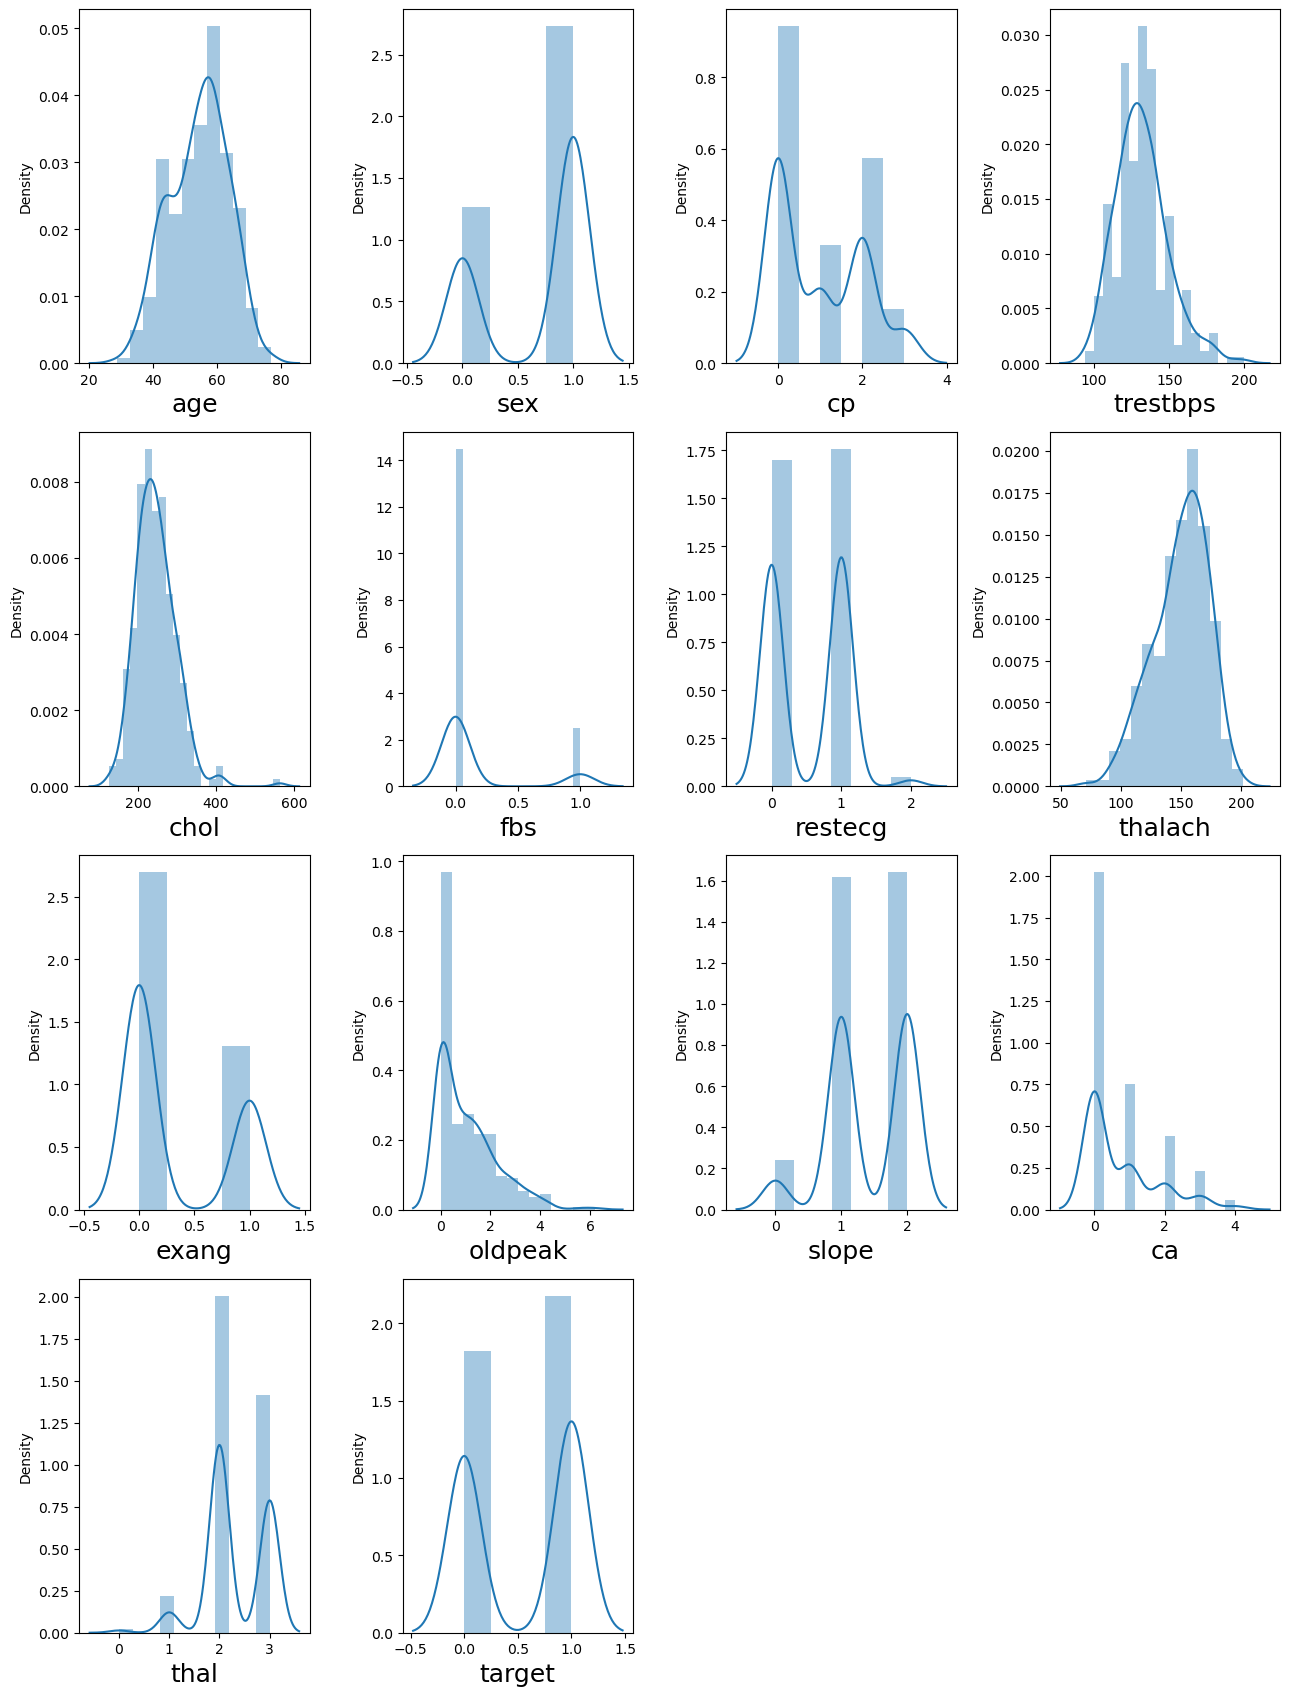

In [14]:
plt.figure(figsize=(13,25)) #it creates a grid of histograms for the numerical columns in the DataFrame, allowing  to visually inspect the distributions of each feature.
pltn=1
for i in data:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=18)
    pltn=pltn+1 
plt.tight_layout() 

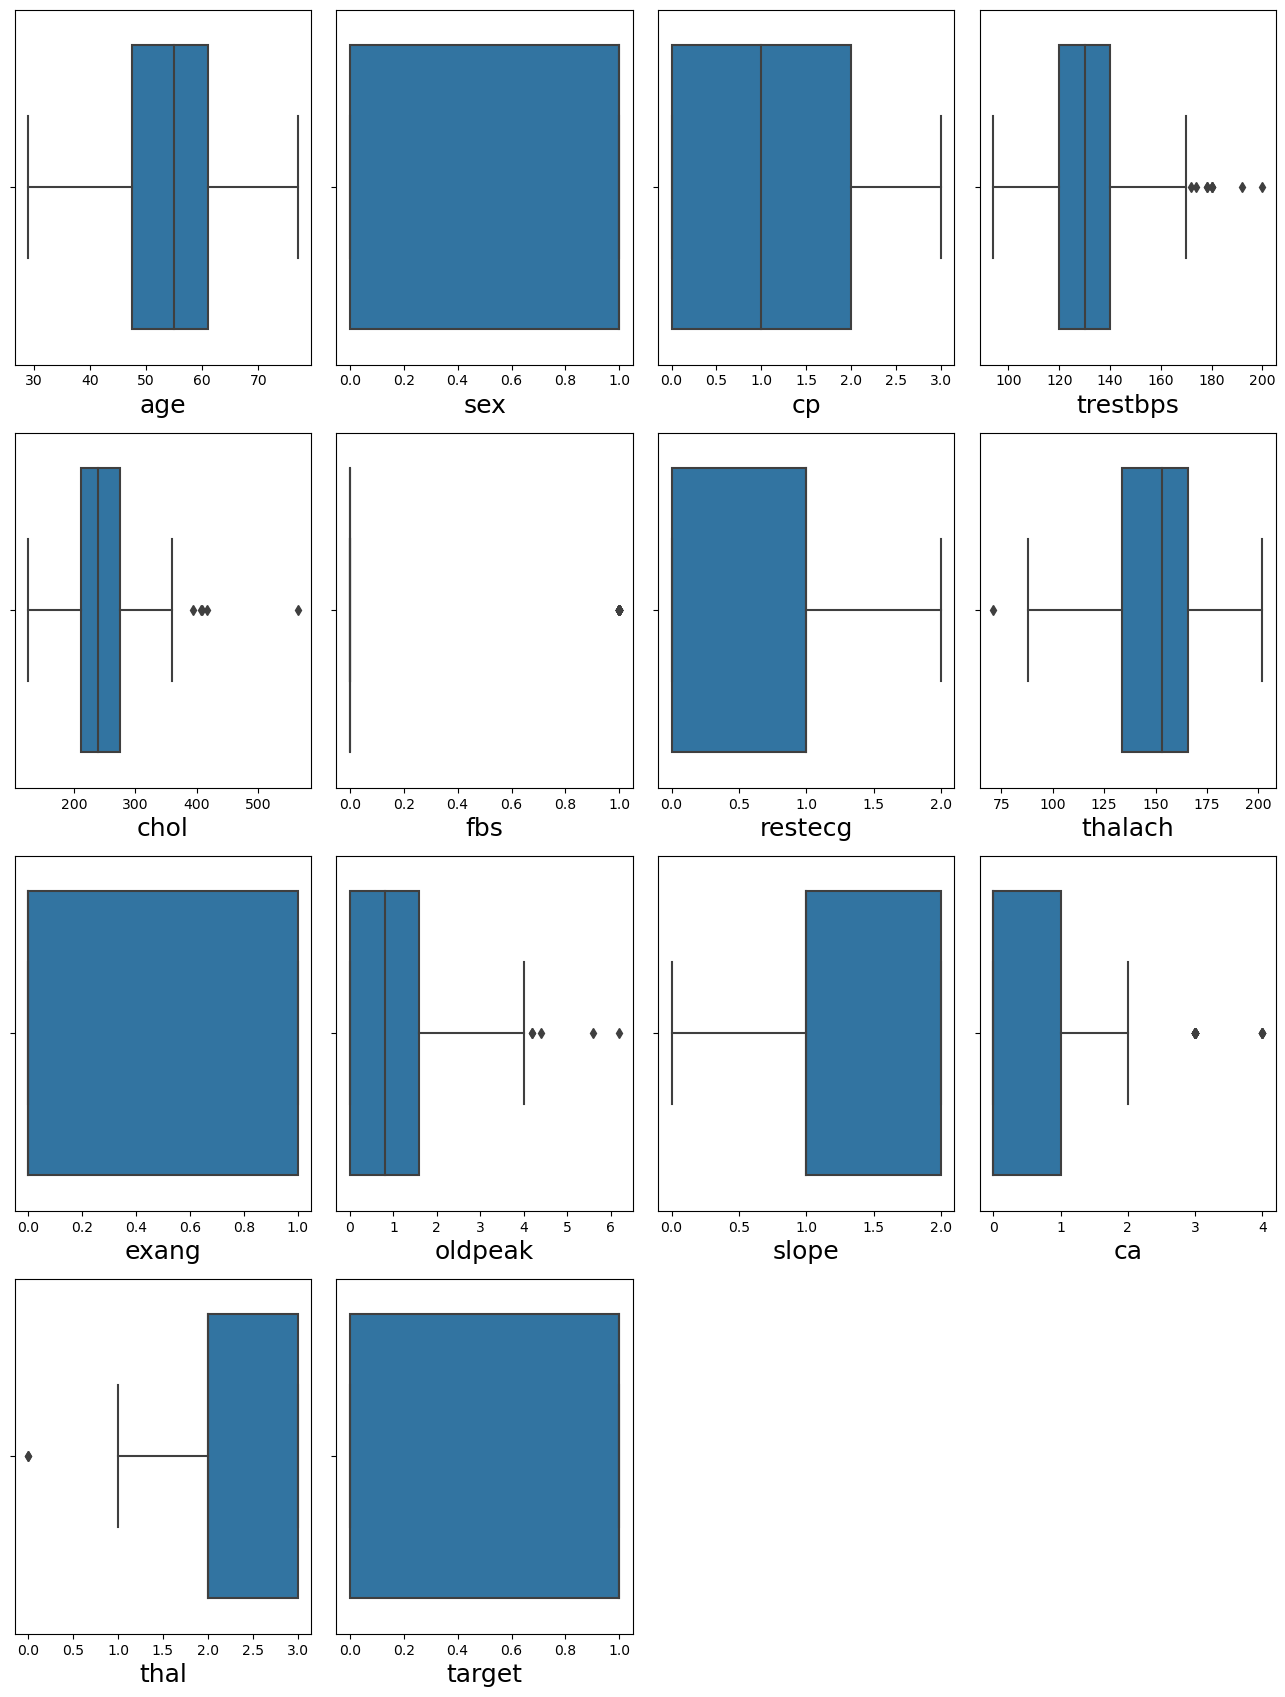

In [15]:
#checking outliers  of numerical columns
plt.figure(figsize=(13,25))
pltn=1
for i in data:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=18)
    pltn=pltn+1 
plt.tight_layout()   

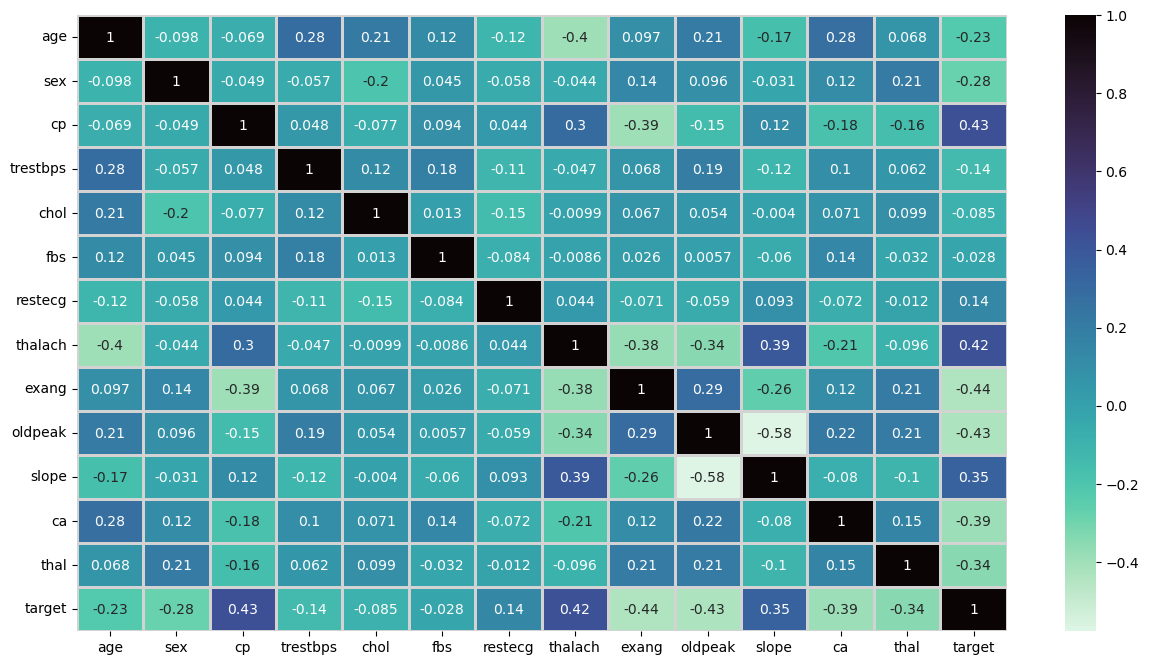

In [16]:
plt.figure(figsize = (15, 8)) # a heatmap is used to visualize the pairwise correlations between different numerical features in a dataset.
sns.heatmap(data.corr(),annot=True,linewidths=2,linecolor='lightgrey',cmap="mako_r")
plt.show()

In [17]:
data.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [18]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ML models
Here I take different machine learning algorithm and try to find algorithm which predict accurately.

Logistic Regression
Naive Bayes
Random Forest Classifier
Extreme Gradient Boost
K-Nearest Neighbour
Decision Tree
Support Vector Machine

In [19]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))
print(f'Training Score: {train_score}\n Testing Score: {test_score}')

confussion matrix
[[32 12]
 [ 5 42]]


Accuracy of Logistic Regression: 81.31868131868131 

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

Training Score: 0.8632075471698113
 Testing Score: 0.8131868131868132


In [20]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
train_score = nb.score(X_train, y_train)
test_score = nb.score(X_test, y_test)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))
print(f'Training Score: {train_score}\n Testing Score: {test_score}')

confussion matrix
[[32 12]
 [ 6 41]]


Accuracy of Naive Bayes model: 80.21978021978022 

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91

Training Score: 0.8443396226415094
 Testing Score: 0.8021978021978022


In [21]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
print(f'Training Score: {train_score}\n Testing Score: {test_score}')

confussion matrix
[[33 11]
 [ 6 41]]


Accuracy of Random Forest: 81.31868131868131 

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

Training Score: 0.9292452830188679
 Testing Score: 0.8131868131868132


In [22]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test, y_test)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

print(f'Training Score: {train_score}\n Testing Score: {test_score}')

confussion matrix
[[28 16]
 [ 4 43]]


Accuracy of Extreme Gradient Boost: 78.02197802197803 

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        44
           1       0.73      0.91      0.81        47

    accuracy                           0.78        91
   macro avg       0.80      0.78      0.77        91
weighted avg       0.80      0.78      0.78        91

Training Score: 0.8773584905660378
 Testing Score: 0.7802197802197802


In [23]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

print(f'Training Score: {train_score}\n Testing Score: {test_score}')

confussion matrix
[[33 11]
 [ 5 42]]


Accuracy of K-NeighborsClassifier: 82.41758241758241 

              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Training Score: 0.8632075471698113
 Testing Score: 0.8241758241758241


In [24]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

print(f'Training Score: {train_score}\n Testing Score: {test_score}')

confussion matrix
[[33 11]
 [ 7 40]]


Accuracy of DecisionTreeClassifier: 80.21978021978022 

              precision    recall  f1-score   support

           0       0.82      0.75      0.79        44
           1       0.78      0.85      0.82        47

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

Training Score: 0.9764150943396226
 Testing Score: 0.8021978021978022


In [25]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
train_score = svc.score(X_train, y_train)
test_score = svc.score(X_test, y_test)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))
print(f'Training Score: {train_score}\n Testing Score: {test_score}')

confussion matrix
[[34 10]
 [ 4 43]]


Accuracy of Support Vector Classifier: 84.61538461538461 

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91

Training Score: 0.9386792452830188
 Testing Score: 0.8461538461538461


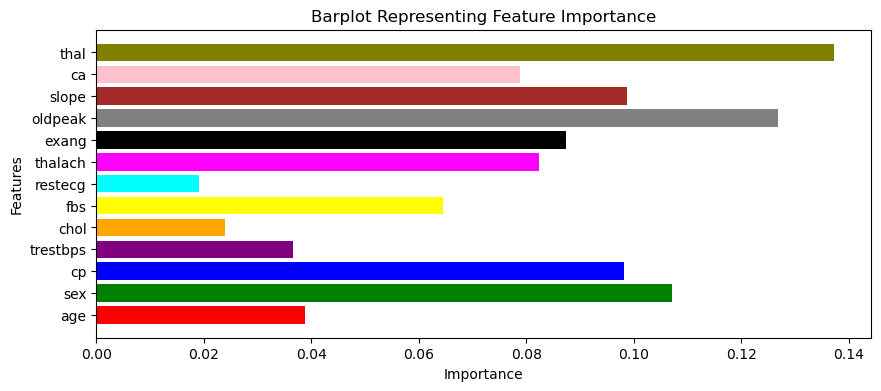

In [26]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})

# Assigning colors to each bar
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'black', 'gray', 'brown', 'pink', 'olive']

plt.figure(figsize=(10, 4))
plt.title("Barplot Representing Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors)
plt.show()

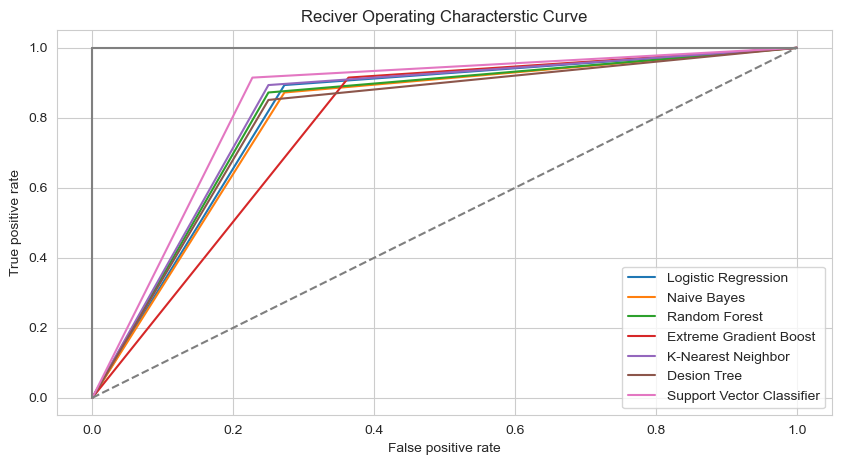

In [27]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


In [28]:
model_evaluation= pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_evaluation

,Model,Accuracy
0,Logistic Regression,81.318681
1,Naive Bayes,80.219780
2,Random Forest,81.318681
3,Extreme Gradient Boost,78.021978
4,K-Nearest Neighbour,82.417582
5,Decision Tree,80.219780
6,Support Vector Machine,84.615385


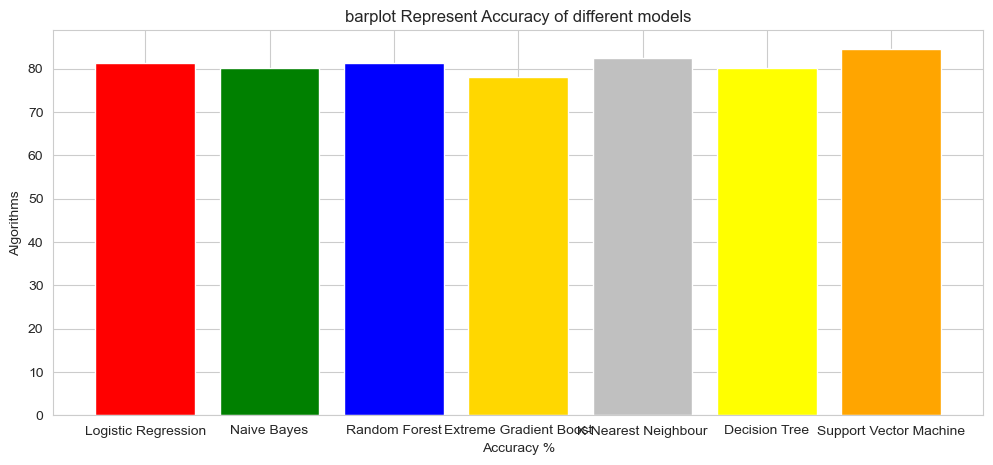

In [29]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_evaluation['Model'],model_evaluation['Accuracy'],color = colors)
plt.show()

Conclusion¶
1) K-Nearest Neighbour and Support Vector Machine gave the best Accuracy compared to other models.

2) Exercise induced angina,Chest pain and thal are major symptoms of heart attack.



